## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.766672 -0.777002  0.729258 -0.801106 -1.044745 -1.924109
1 -0.593783 -1.283072 -0.467925  1.540150 -1.000428 -0.477408
2 -0.753518  0.617484 -0.627571 -1.657475 -1.360878 -1.391862
3  0.046895  0.215342 -1.102796  1.535090 -1.485996  1.017899
4  0.003023 -0.870024 -1.566985 -0.918484 -0.354669 -0.408595


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9866083	total: 46.7ms	remaining: 46.7s
1:	learn: 0.9755116	total: 47.2ms	remaining: 23.5s
2:	learn: 0.9647990	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9544518	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9461947	total: 48.3ms	remaining: 9.61s
5:	learn: 0.9369416	total: 48.7ms	remaining: 8.06s
6:	learn: 0.9260744	total: 49ms	remaining: 6.95s
7:	learn: 0.9153840	total: 49.4ms	remaining: 6.12s
8:	learn: 0.9062082	total: 49.7ms	remaining: 5.47s
9:	learn: 0.8963130	total: 50.1ms	remaining: 4.96s
10:	learn: 0.8871432	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8762992	total: 50.9ms	remaining: 4.19s
12:	learn: 0.8658049	total: 51.2ms	remaining: 3.89s
13:	learn: 0.8574717	total: 51.6ms	remaining: 3.63s
14:	learn: 0.8497093	total: 51.9ms	remaining: 3.41s
15:	learn: 0.8403322	total: 52.3ms	remaining: 3.21s
16:	learn: 0.8318762	total: 52.6ms	remaining: 3.04s
17:	learn: 0.8232754	total: 53ms	remaining: 2.89s
18:	learn: 0.8127180	total: 53.3ms	remaining: 2.

209:	learn: 0.1750566	total: 122ms	remaining: 457ms
210:	learn: 0.1737507	total: 122ms	remaining: 456ms
211:	learn: 0.1725954	total: 122ms	remaining: 455ms
212:	learn: 0.1713706	total: 123ms	remaining: 453ms
213:	learn: 0.1702031	total: 123ms	remaining: 452ms
214:	learn: 0.1686638	total: 123ms	remaining: 451ms
215:	learn: 0.1675975	total: 124ms	remaining: 449ms
216:	learn: 0.1661699	total: 124ms	remaining: 448ms
217:	learn: 0.1650685	total: 125ms	remaining: 447ms
218:	learn: 0.1633900	total: 125ms	remaining: 446ms
219:	learn: 0.1622521	total: 125ms	remaining: 444ms
220:	learn: 0.1609568	total: 126ms	remaining: 443ms
221:	learn: 0.1597676	total: 126ms	remaining: 442ms
222:	learn: 0.1583862	total: 127ms	remaining: 441ms
223:	learn: 0.1572713	total: 127ms	remaining: 440ms
224:	learn: 0.1563832	total: 127ms	remaining: 439ms
225:	learn: 0.1555830	total: 128ms	remaining: 437ms
226:	learn: 0.1544234	total: 128ms	remaining: 436ms
227:	learn: 0.1534005	total: 128ms	remaining: 435ms
228:	learn: 

475:	learn: 0.0394438	total: 226ms	remaining: 249ms
476:	learn: 0.0393046	total: 226ms	remaining: 248ms
477:	learn: 0.0390519	total: 227ms	remaining: 248ms
478:	learn: 0.0388250	total: 227ms	remaining: 247ms
479:	learn: 0.0386025	total: 228ms	remaining: 247ms
480:	learn: 0.0384243	total: 228ms	remaining: 246ms
481:	learn: 0.0382066	total: 228ms	remaining: 245ms
482:	learn: 0.0380324	total: 229ms	remaining: 245ms
483:	learn: 0.0378193	total: 229ms	remaining: 244ms
484:	learn: 0.0376103	total: 229ms	remaining: 244ms
485:	learn: 0.0374405	total: 230ms	remaining: 243ms
486:	learn: 0.0372360	total: 230ms	remaining: 243ms
487:	learn: 0.0370700	total: 231ms	remaining: 242ms
488:	learn: 0.0368047	total: 231ms	remaining: 242ms
489:	learn: 0.0365451	total: 232ms	remaining: 241ms
490:	learn: 0.0363838	total: 232ms	remaining: 240ms
491:	learn: 0.0361399	total: 232ms	remaining: 240ms
492:	learn: 0.0359824	total: 233ms	remaining: 239ms
493:	learn: 0.0357896	total: 233ms	remaining: 239ms
494:	learn: 

745:	learn: 0.0102045	total: 325ms	remaining: 111ms
746:	learn: 0.0101661	total: 326ms	remaining: 110ms
747:	learn: 0.0101196	total: 326ms	remaining: 110ms
748:	learn: 0.0100721	total: 326ms	remaining: 109ms
749:	learn: 0.0100348	total: 327ms	remaining: 109ms
750:	learn: 0.0100133	total: 327ms	remaining: 108ms
751:	learn: 0.0099686	total: 327ms	remaining: 108ms
752:	learn: 0.0099211	total: 328ms	remaining: 108ms
753:	learn: 0.0098834	total: 328ms	remaining: 107ms
754:	learn: 0.0098574	total: 328ms	remaining: 107ms
755:	learn: 0.0098366	total: 329ms	remaining: 106ms
756:	learn: 0.0097874	total: 329ms	remaining: 106ms
757:	learn: 0.0097668	total: 329ms	remaining: 105ms
758:	learn: 0.0096968	total: 330ms	remaining: 105ms
759:	learn: 0.0096561	total: 330ms	remaining: 104ms
760:	learn: 0.0096311	total: 330ms	remaining: 104ms
761:	learn: 0.0095635	total: 331ms	remaining: 103ms
762:	learn: 0.0095435	total: 331ms	remaining: 103ms
763:	learn: 0.0094993	total: 331ms	remaining: 102ms
764:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

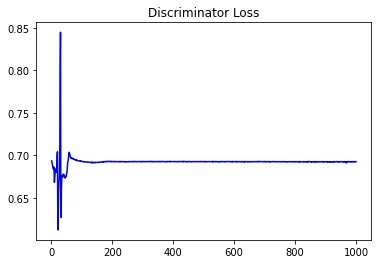

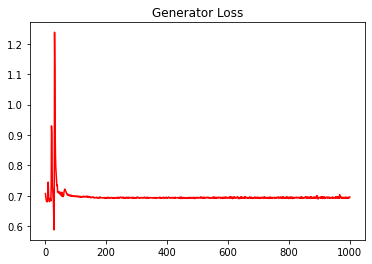

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05697424630946993


#### Sanity Checks 

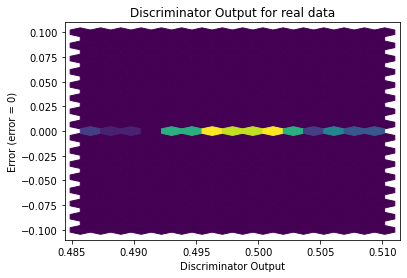

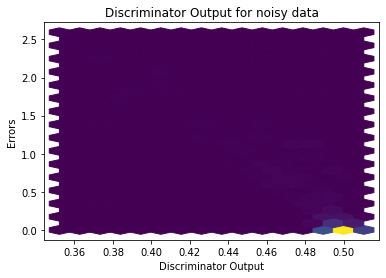

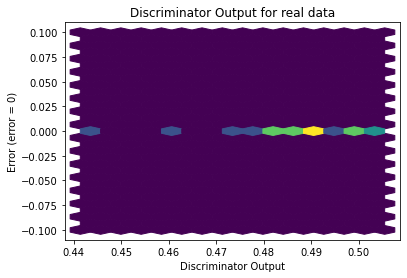

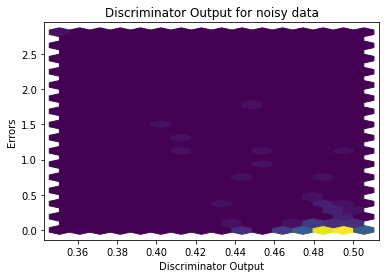

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


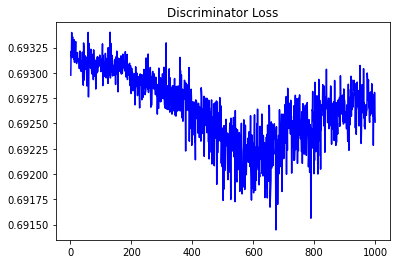

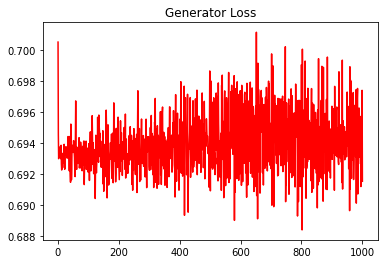

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.044057816196774624


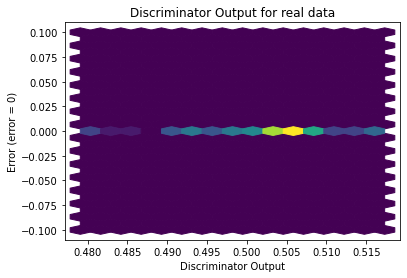

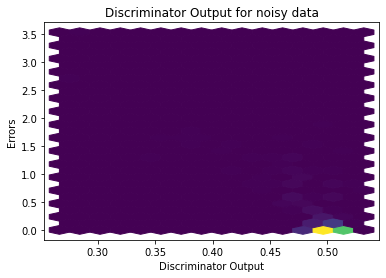

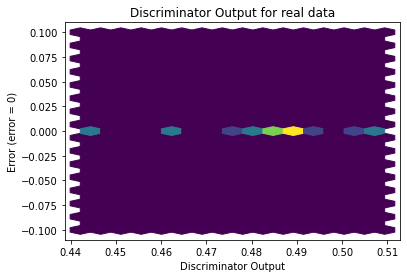

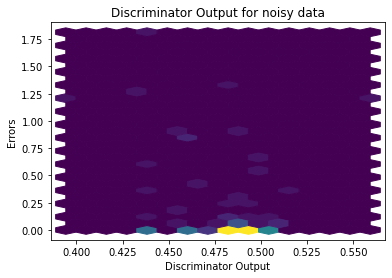

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1312]], device='cuda:0', requires_grad=True)
